## **Code contributions:**
1. Harshitha Biligere Harish (hbilige)
2. Arpita Ajit Welling (awellin)
3. Sanika Anil Parajanpe (sparanjp)

In [ ]:
!pip install contractions
#!pip install keras
#!pip install tensorflow

In [ ]:
#Code for all necessary imports
import numpy as np
import pandas as pd
import os
from zipfile import ZipFile
from pathlib import Path
from io import StringIO
import string  
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
import nltk
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
import contractions
import matplotlib.pyplot as plt




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#connecting google drive to google colab to access dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Unzipping the Dataset to access the training data
zf = ZipFile('/content/drive/MyDrive/AMLProjectDataset.zip')
t_df = pd.read_csv(zf.open('cnn_dailymail/train.csv'))

In [ ]:
t_df.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [ ]:
#ID field is irrelevent so dropped it.
train_df = t_df.copy()

In [ ]:
train_df = train_df.drop(['id'], axis=1)

In [ ]:
# Visualize data after dropping the ID field
train_df.head()

,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     287113 non-null  object
 1   highlights  287113 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


[1211, 2544, 4743, 3181, 3439, 1875, 4074, 3571, 3378, 5303]
[220, 223, 390, 297, 401, 214, 138, 325, 324, 340]


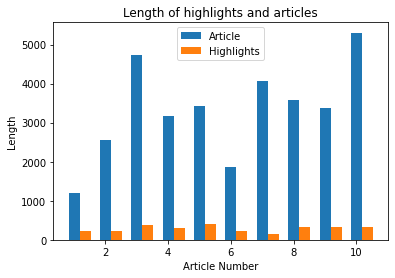

In [ ]:
first_articles=train_df["article"][0:10]
first_highlights=train_df["highlights"][0:10]

article_length=[]
highlights_length=[]
for i in range(len(first_articles)):
  article_length.append(len(first_articles[i]))
  highlights_length.append(len(first_highlights[i]))

print(article_length)
print(highlights_length)

ind = np.arange(1,11)
width = 0.35       
plt.bar(ind, article_length, width, label='Article')
plt.bar(ind + width, highlights_length, width,label='Highlights')

plt.xlabel('Article Number')
plt.ylabel('Length')
plt.title('Length of highlights and articles')
plt.legend(loc='best')
plt.show()


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Removing the text between brackets
import re
train_df['article'][0]
type(train_df)
processed_sent=[]
for sent in train_df['article'][0:10]:
  processed_sent_sub=re.sub("[\(\[].*?[\)\]]", "", sent)
  processed_sent_sub=contractions.fix(processed_sent_sub)
  processed_sent.append(processed_sent_sub)


In [ ]:
# processed_sent[0]

In [ ]:
# Seperate the words and puncuations and store it as a list of strings for each article
import re
WORD = re.compile(r'\w+')
sentence = []
for art in processed_sent:
    words = WORD.findall(art)
    # print(words)
    sentence.append(words)
    

In [ ]:
eng_stopwords = stopwords.words('english')
punctuation = string.punctuation
# punctuation = punctuation.replace('.','')

In [ ]:
print(len(sentence))
# print(sentence)

10


In [ ]:
#Removes word with less than 2 characters
#Removes english stopwords
#Removes punctuations
#Performs Lemming on the data
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    """Map POS tag to first character lemmatize() accepts"""
    # tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

format_sent = []
pos_analysis = []
for sntc in sentence:
    format_words = []
    for word in sntc:
#         print(word)
        if word not in eng_stopwords and word not in punctuation and len(word)>2:
          # word_count +=1
          # word_ = lemmatizer.lemmatize(word.lower())
          format_words.append(word)
    format_words = nltk.pos_tag(format_words)
    pos_analysis.append(format_words)
    doc = [lemmatizer.lemmatize(word[0],get_wordnet_pos(word[1][0].upper())) for word in format_words]
    format_sent.append(" ".join(doc))

In [ ]:
import matplotlib.pyplot as plt
pos_analysis
pos_dict = {}
for doc in pos_analysis:
  for word,tag in doc: 
    if tag in pos_dict.keys():
      pos_dict[tag] +=1
    else:
      pos_dict[tag] = 1
  
pos_dict = sorted(pos_dict.items(), key=lambda x: x[1], reverse=True)
pos_dict = dict(pos_dict[:15])
pos_dict



{'CD': 80,
 'DT': 51,
 'IN': 57,
 'JJ': 362,
 'MD': 34,
 'NN': 776,
 'NNP': 693,
 'NNS': 282,
 'RB': 144,
 'VB': 64,
 'VBD': 230,
 'VBG': 177,
 'VBN': 51,
 'VBP': 91,
 'VBZ': 75}

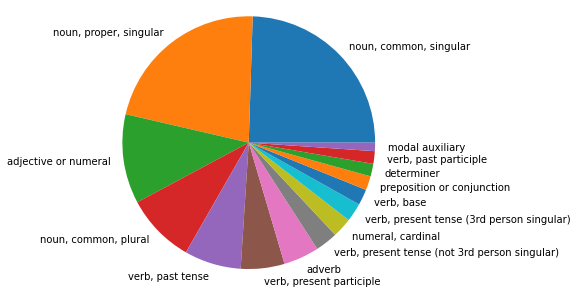

In [ ]:
from IPython.core.pylabtools import figsize
names = {"CD":"numeral, cardinal", "DT":"determiner","IN":"preposition or conjunction", "JJ":"adjective or numeral","MD":"modal auxiliary","NN":"noun, common, singular","NNP":"noun, proper, singular","NNS":"noun, common, plural","RB":"adverb","VB":"verb, base","VBD":"verb, past tense","VBG":"verb, present participle","VBN":"verb, past participle","VBP":"verb, present tense (not 3rd person singular)","VBZ":"verb, present tense (3rd person singular)"}
plt.figure(figsize= (5,5))
label = []
values = []
for key,val in pos_dict.items():
  # print(key)
  values.append(val)
  label.append(names[key])
plt.pie(values, labels=label)
plt.axis('equal')
plt.show()



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# Decide token numbers for each word

tokenizer = Tokenizer(oov_token = "<UNK>")
tokenizer.fit_on_texts(format_sent)
word_index=tokenizer.word_index


In [ ]:
len(word_index)

1516

In [ ]:
sequences=tokenizer.texts_to_sequences(format_sent)

In [ ]:
# word_count

In [ ]:
# Pre-padding zeros to every sequence as per the length of the maximum sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(sequences, padding = "pre") 

In [ ]:
print(padded)

[[   0    0    0 ...  210  105  654]
 [   0    0    0 ...  727  230  384]
 [   0    0    0 ...  787  788   33]
 ...
 [   0    0    0 ...   51   45  115]
 [   0    0    0 ...  539 1361  287]
 [1362  321   35 ... 1516  230  384]]


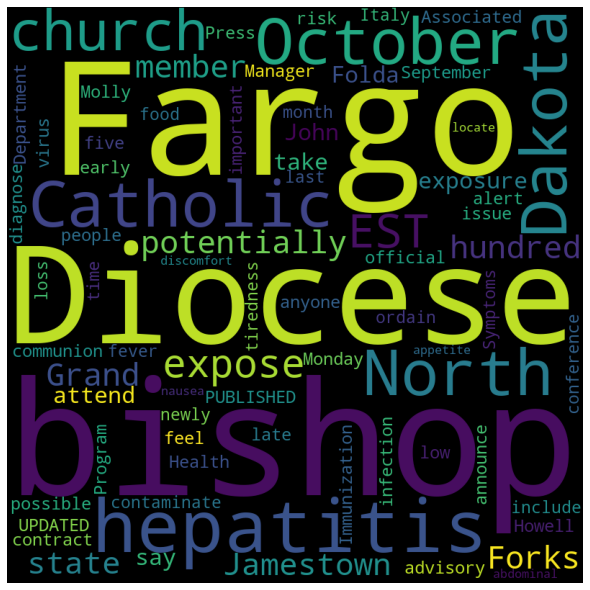

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                      stopwords = stopwords,
                      min_font_size = 10).generate(format_sent[0])

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()